In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import dlib
from tqdm import tqdm_notebook as tqdm
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for dirname, _, _ in os.walk("/content/drive/MyDrive/FaceRecogStudAtt") :
    print(dirname)

/content/drive/MyDrive/FaceRecogStudAtt
/content/drive/MyDrive/FaceRecogStudAtt/Training images


In [ ]:
image_paths = []
image_names = []
image_dir = "//content/drive/MyDrive/FaceRecogStudAtt/Training images/"
for image_name in tqdm(os.listdir(image_dir)) :
    image_path = image_dir + image_name
    image_paths.append(image_path)
    image_names.append(image_name)

<ipython-input-4-02b78892c756>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for image_name in tqdm(os.listdir(image_dir)) :


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
len(image_names), len(image_paths)

(1, 1)

In [ ]:
image_dataframe = pd.DataFrame(index = np.arange(len(image_names)), columns = ["image_name", "path"])

i = 0
for name, path in tqdm(zip(image_names, image_paths)) :
    image_dataframe.iloc[i]["image_name"] = name
    image_dataframe.iloc[i]["path"] = path
    i = i + 1

print("Dataframe shape = ", image_dataframe.shape)

<ipython-input-6-edc3c47779e5>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for name, path in tqdm(zip(image_names, image_paths)) :


0it [00:00, ?it/s]

Dataframe shape =  (1, 2)


In [ ]:
image_dataframe.head()

,image_name,path
0,S__3645490.jpg,//content/drive/MyDrive/FaceRecogStudAtt/Train...


In [ ]:
sample_images = []

In [ ]:
def get_images() :
    sample_images = []
    random_image_paths = [np.random.choice(image_dataframe["path"]) for i in range(1)]

    plt.figure(figsize = (12, 8))
    for i in range(1) :
        plt.subplot(2,3, i+1)
        image = cv2.imread(random_image_paths[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        sample_images.append(image)
        plt.imshow(image, cmap = "gray")
        plt.grid(False)
    plt.tight_layout() # Automatically adjust subplot parameters to give specified padding.
    return sample_images

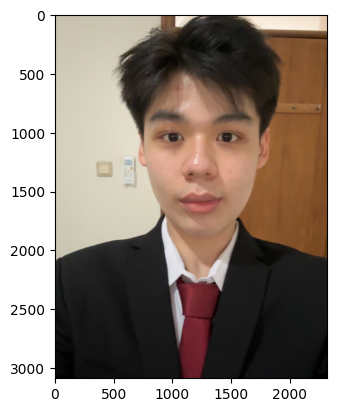

In [ ]:
sample_images = get_images()

In [ ]:
def haar_cascade_detection(sample_images) :
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    for image in tqdm(sample_images) :
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=10, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)

        for (x_coordinate, y_coordinate, height, width) in faces :
            cv2.rectangle(image, (x_coordinate, y_coordinate), (x_coordinate + width, y_coordinate + height), (0, 255, 0), thickness = 4)



In [ ]:
haar_cascade_detection(sample_images)

<ipython-input-18-25df8fea81f3>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for image in tqdm(sample_images) :


  0%|          | 0/1 [00:00<?, ?it/s]

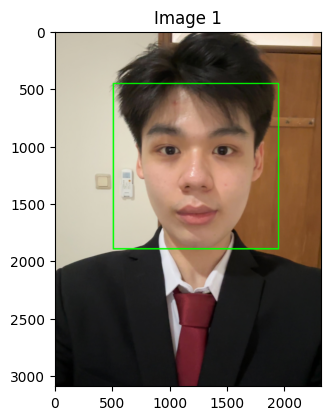

In [ ]:
plt.figure(figsize = (12, 8))
for i in range(1) :
    plt.subplot(2,3, i+1)
    plt.imshow(sample_images[i], cmap = "gray")
    plt.title("Image {}".format(i+1))
    plt.grid(False)
plt.tight_layout() # Automatically adjust subplot parameters to give specified padding.